In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import Sequential
from tensorflow.keras import layers
from tensorflow.keras import regularizers
from keras.optimizers import RMSprop, Adam, SGD, Adadelta
from tensorflow.keras.utils import plot_model
import matplotlib.pyplot as plt
import seaborn as sns
import os

from datetime import datetime
from packaging import version
import tensorflow as tf
from tensorflow import keras

import tensorboard
tensorboard.__version__


'2.3.0'

In [4]:
%load_ext tensorboard
!rm -rf ./logs/

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


'rm' is not recognized as an internal or external command,
operable program or batch file.


In [5]:
base_dir = 'Output/NomalChildWorking/'
train_dr = 'Eye dataset/'
test_dr ='NomalChild/'
pixels = 60
colormode = 'grayscale'
classmode = 'binary'

In [6]:
train_datagen = ImageDataGenerator()
test_datagen = ImageDataGenerator()

"""Load data with Ternsorflow image generator"""
train_generator = train_datagen.flow_from_directory(train_dr,target_size=(pixels, pixels), color_mode=colormode, class_mode = classmode, batch_size = 20)
test_generator = test_datagen.flow_from_directory(test_dr,target_size=(pixels, pixels), color_mode=colormode, class_mode = classmode, batch_size = 20)

Found 14360 images belonging to 4 classes.
Found 23 images belonging to 4 classes.


In [7]:
"""Construct the CNN model"""
CNN_Model = Sequential([
    layers.Conv2D(filters=16,kernel_size=(3,3),activation='relu', input_shape=(pixels,pixels,1)),
    layers.MaxPooling2D(pool_size=(2, 2),strides=None,padding='valid'),
    layers.Dropout(0.25),

    layers.Conv2D(filters=16,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2),strides=None,padding='valid'),
    layers.Dropout(0.25),

    layers.Conv2D(filters=16,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2),strides=None,padding='valid'),
    layers.Dropout(0.25),

    layers.Flatten(),
    
    layers.Dense(400,activation='relu'),
    layers.Dropout(0.25),
    layers.Dense(4,activation='softmax') # Final Layer using Softmax
    
    ])

In [8]:
""" COMPILE The Model """
CNN_Model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy',metrics = ['acc'])

In [9]:
"""""" """Define the Keras TensorBoard callback."""
logdir="logs/fit/" + datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir)

In [10]:
""" FIT THE MODEL"""
FITCNN= CNN_Model.fit(train_generator,validation_data = test_generator,epochs = 10,verbose = 1 )

Epoch 1/10
718/718 [==============================] - 273s 380ms/step - loss: 1.6195 - acc: 0.4985 - val_loss: 1.3555 - val_acc: 0.2609
Epoch 2/10
718/718 [==============================] - 33s 46ms/step - loss: 0.5425 - acc: 0.7857 - val_loss: 1.4620 - val_acc: 0.3913
Epoch 3/10
718/718 [==============================] - 28s 39ms/step - loss: 0.3460 - acc: 0.8780 - val_loss: 2.2321 - val_acc: 0.2174
Epoch 4/10
718/718 [==============================] - 28s 39ms/step - loss: 0.2553 - acc: 0.9134 - val_loss: 2.8402 - val_acc: 0.3043
Epoch 5/10
718/718 [==============================] - 30s 41ms/step - loss: 0.2231 - acc: 0.9235 - val_loss: 3.1404 - val_acc: 0.2174
Epoch 6/10
718/718 [==============================] - 30s 42ms/step - loss: 0.1933 - acc: 0.9345 - val_loss: 3.1056 - val_acc: 0.2174
Epoch 7/10
718/718 [==============================] - 31s 43ms/step - loss: 0.1671 - acc: 0.9459 - val_loss: 4.3663 - val_acc: 0.3043
Epoch 8/10
718/718 [==============================] - 31s 43

In [11]:
""" SAVE THE MODEL"""
CNN_Model.save(
    base_dir, overwrite=True, include_optimizer=True, save_format='tf',
    signatures=None, options=None
)

CNN_Model.save_weights(
    base_dir, overwrite=True, save_format=None
)
""" CNN MODEL ARCHITECTURE"""
CNN_Model.summary(
    line_length=None, positions=None, print_fn=None
)

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: Output/NomalChildWorking/assets
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 58, 58, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 29, 29, 16)        0         
_________________________________________________________________
dropout (Dropout)            (None, 29, 29, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 27, 27, 16)        2320      
_________________________________________________________________
max_pooling2d_1 (Ma

('Failed to import pydot. You must `pip install pydot` and install graphviz (https://graphviz.gitlab.io/download/), ', 'for `pydotprint` to work.')


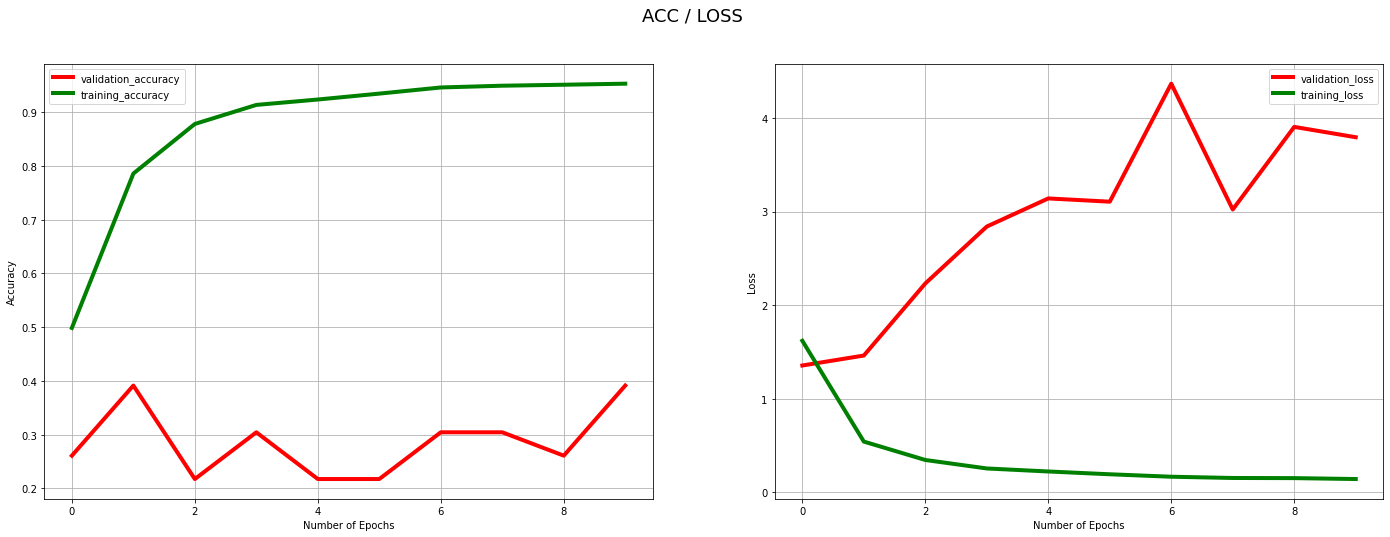

In [15]:
""" PLOT THE ACCURACY AND LOSS """
plot_model(CNN_Model,to_file='Output/Working/model.png',show_shapes=True,show_layer_names=True, expand_nested=True)

plt.figure(figsize=(24,8))
plt.subplot(1,2,1)
plt.plot(FITCNN.history["val_acc"], label="validation_accuracy", c="red", linewidth=4)
plt.plot(FITCNN.history["acc"], label="training_accuracy", c="green", linewidth=4)
plt.ylabel("Accuracy")
plt.xlabel("Number of Epochs")
plt.legend()
plt.grid(True)

plt.subplot(1,2,2)
plt.plot(FITCNN.history["val_loss"], label="validation_loss", c="red", linewidth=4)
plt.plot(FITCNN.history["loss"], label="training_loss", c="green", linewidth=4)
plt.ylabel("Loss")
plt.xlabel("Number of Epochs")
plt.legend()
plt.grid(True)

plt.suptitle("ACC / LOSS",fontsize=18)
plt.show()


In [16]:
%tensorboard --logdir logs

Reusing TensorBoard on port 6006 (pid 6532), started 1 day, 19:02:39 ago. (Use '!kill 6532' to kill it.)